In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [15]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

# Step 3: Basic Info
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

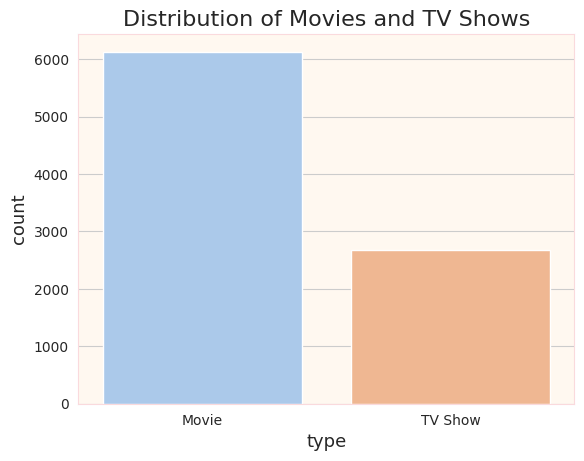

In [16]:
sns.countplot(data=df, x='type')
plt.title('Distribution of Movies and TV Shows')
plt.show()


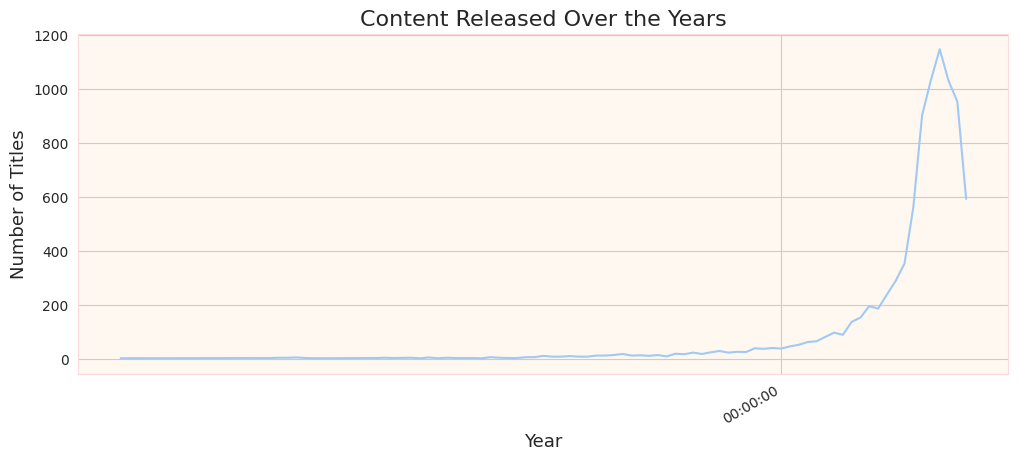

In [17]:
df['release_year'] = pd.to_datetime(df['release_year'], errors='coerce')
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,5))
plt.title('Content Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


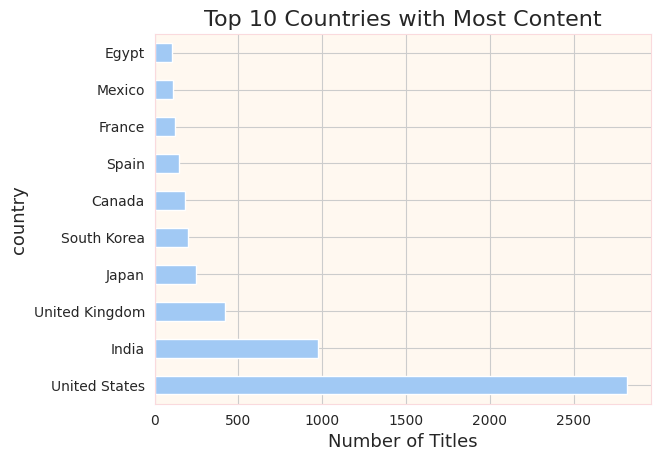

In [18]:
df['country'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.show()


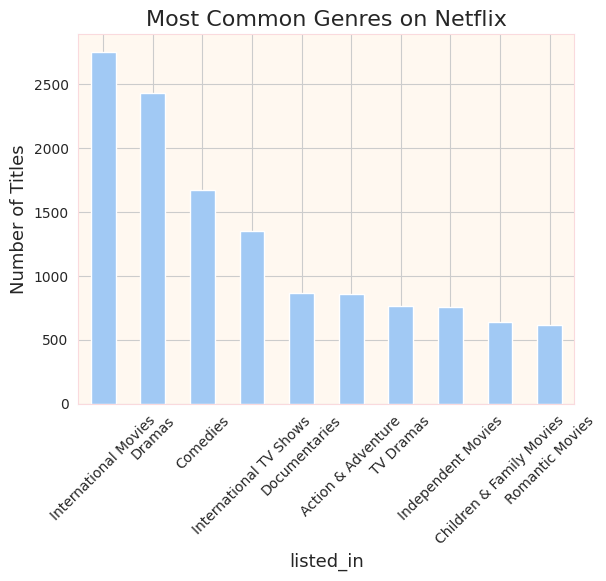

In [19]:
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='bar')
plt.title('Most Common Genres on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


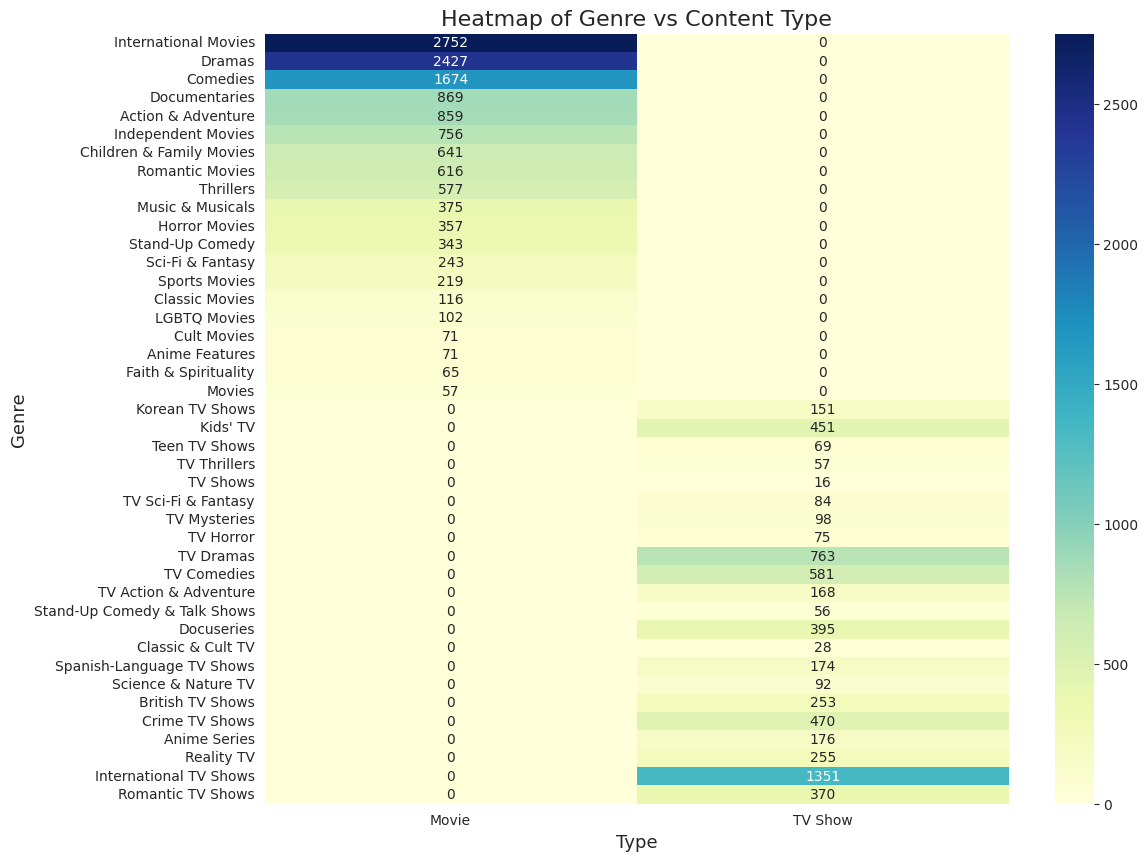

In [20]:
# Split listed_in (genres) and explode
genre_data = df[['type', 'listed_in']].dropna()
genre_data['listed_in'] = genre_data['listed_in'].str.split(', ')
genre_data = genre_data.explode('listed_in')

# Create pivot table
pivot = genre_data.pivot_table(index='listed_in', columns='type', aggfunc='size', fill_value=0)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot.sort_values(by='Movie', ascending=False), cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Genre vs Content Type')
plt.xlabel('Type')
plt.ylabel('Genre')
plt.show()


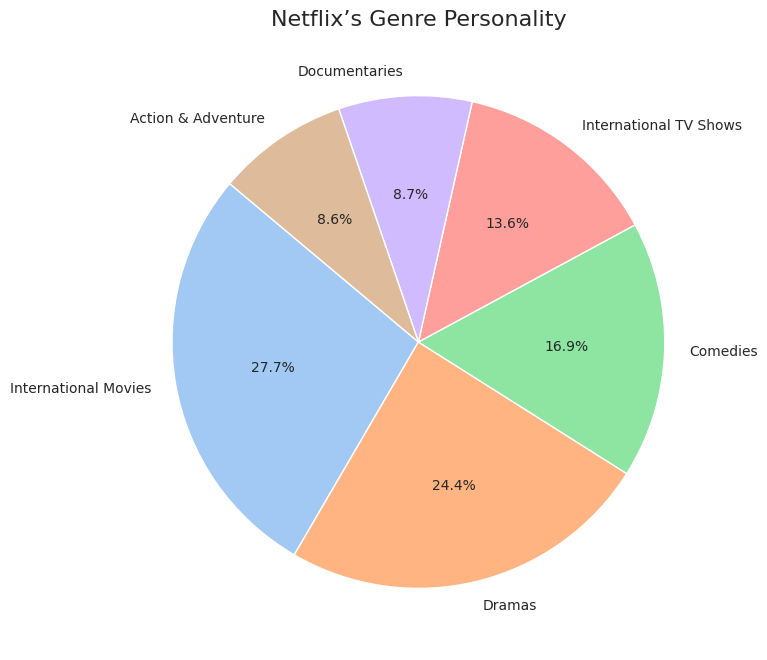

In [21]:
# Top 6 genres (combined from 'listed_in')
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(6)

top_genres.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140, colors=sns.color_palette('pastel'))
plt.title("Netflix’s Genre Personality")
plt.ylabel("")
plt.show()
